<!-- HTML file automatically generated from DocOnce source (https://github.com/doconce/doconce/)
doconce format html hw7.do.txt --no_mako -->
<!-- dom:TITLE: PHY321: Classical Mechanics 1 -->

# PHY321: Classical Mechanics 1
**Homework 7, due Monday  March 27th**

Name: **Cesarine Graham**

Date: **Mar 24, 2022**

### Introduction to homework 7

In this week's homework we will apply our insights about harmonic
oscillations. The relevant material to survey is chapter 5 of Taylor.
See also the slides from [week 11](https://mhjensen.github.io/Physics321/doc/pub/week10/html/week10.html).

We have also added an exercise (exercise 2) related to our discussion of two-body problems. 
The relevant reading background for exercise 2 is given by sections 8.1-8.2 of Taylor.

### Exercise 1 (80 pts), the mathematical pendulum

Relevant reading here is Taylor chapter 5 and the lecture notes on oscillations from [week 11](https://mhjensen.github.io/Physics321/doc/pub/week10/html/week10.html).

The angular equation of motion of the pendulum is given by
Newton's equation and with no external force it reads

<!-- Equation labels as ordinary links -->
<div id="_auto1"></div>

$$
\begin{equation}
  ml\frac{d^2\theta}{dt^2}+mgsin(\theta)=0,
\label{_auto1} \tag{1}
\end{equation}
$$

with an angular velocity and acceleration given by

<!-- Equation labels as ordinary links -->
<div id="_auto2"></div>

$$
\begin{equation}
     v=l\frac{d\theta}{dt},
\label{_auto2} \tag{2}
\end{equation}
$$

and

<!-- Equation labels as ordinary links -->
<div id="_auto3"></div>

$$
\begin{equation}
     a=l\frac{d^2\theta}{dt^2}.
\label{_auto3} \tag{3}
\end{equation}
$$

We do however expect that the motion will gradually come to an end
due a viscous drag torque acting on the pendulum. 
In the presence of the drag, the above equation becomes

<!-- Equation labels as ordinary links -->
<div id="eq:pend1"></div>

$$
\begin{equation}
   ml\frac{d^2\theta}{dt^2}+\nu\frac{d\theta}{dt}  +mgsin(\theta)=0,
\label{eq:pend1} \tag{4}
\end{equation}
$$

where $\nu$ is now a positive constant parameterizing the viscosity
of the medium in question. In order to maintain the motion against
viscosity, it is necessary to add some external driving force. 
We choose here a periodic driving force. The last equation becomes then

<!-- Equation labels as ordinary links -->
<div id="eq:pend2"></div>

$$
\begin{equation}
   ml\frac{d^2\theta}{dt^2}+\nu\frac{d\theta}{dt}  +mgsin(\theta)=Asin(\omega t),
\label{eq:pend2} \tag{5}
\end{equation}
$$

with $A$ and $\omega$ two constants representing the amplitude and 
the angular frequency respectively. The latter is called the driving frequency.

* 1a (10pts)

Rewrite Eqs. ([4](#eq:pend1)) and ([5](#eq:pend2)) as dimensionless
equations in time. 

* 1b (40pts)

Write then a code which solves Eq. ([4](#eq:pend1)) using the
Euler-Cromer method or for example the fourth-order Runge Kutta method. Perform
calculations for at least ten periods with $N=100$, $N=1000$ and
$N=10000$ integration points/discretization points in time (such points are often called mesh points) and values of $\nu = 1$, $\nu = 5$ and $\nu
=10$.  Set $l=1.0$ m, $g=1$ m/s$^2$ and $m=1$ kg.  Choose as initial
conditions $\theta(0) = 0.2$ (radians) and $v(0) = 0$ (radians/s).
Make plots of $\theta$ (in radians) as function of time and phase
space plots of $\theta$ versus the velocity $v$.  Check the stability
of your results as functions of time and number of discretization/mesh points.  Which
case corresponds to damped, underdamped and overdamped oscillatory
motion?  Comment your results.

* 1c (30pts) 

Now we switch to Eq. ([5](#eq:pend2)) for the rest of the exercise. Add
an external driving force and set $l=g=1$, $m=1$, $\nu = 1/2$ and
$\omega = 2/3$.  Choose as initial conditions $\theta(0) = 0.2$ and
$v(0) = 0$ and $A=0.5$ and $A=1.2$.  Make plots of $\theta$ (in
radians) as function of time for at least 300 periods and phase space
plots of $\theta$ versus the velocity $v$. Choose an appropriate time
step. Comment and explain the results for the different values of $A$.

* 1d **optional exercise** (20pts bonus) 

Keep now the constants from the previous exercise fixed but
set now $A=1.35$, $A=1.44$ and $A=1.465$. Plot $\theta$ (in radians)
as function of time for at least 300 periods for these values of $A$
and comment your results.

* 1e **optional exercise** (20pts bonus)

We want to analyse further these results by making phase space plots
of $\theta$ versus the velocity $v$ using only the points where we
have $\omega t=2n\pi$ where $n$ is an integer. These are normally
called the drive periods.  This is an example of what is called a
Poincare section and is a very useful way to plot and analyze the
behavior of a dynamical system. Comment your results.

#### Please see the solution to 1a on the attached PDF

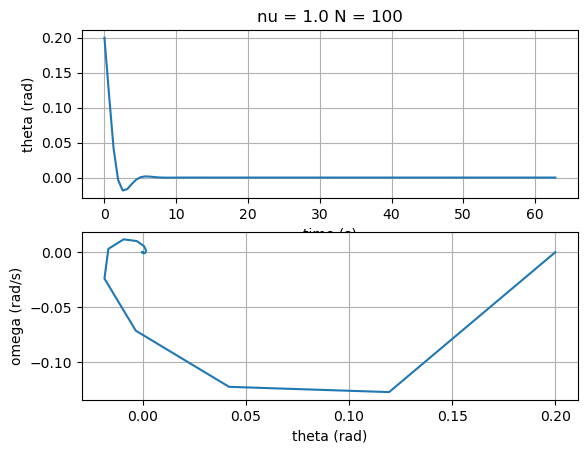

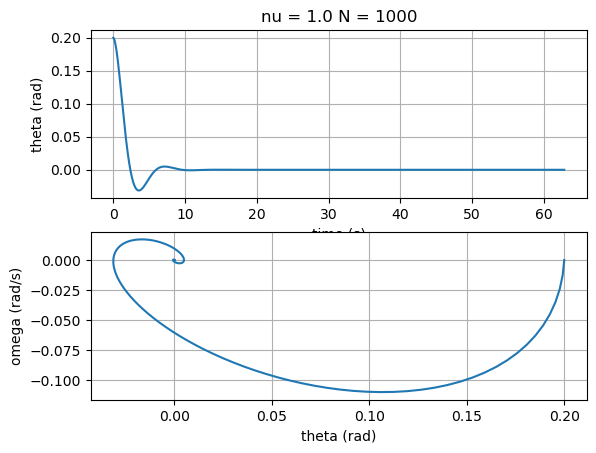

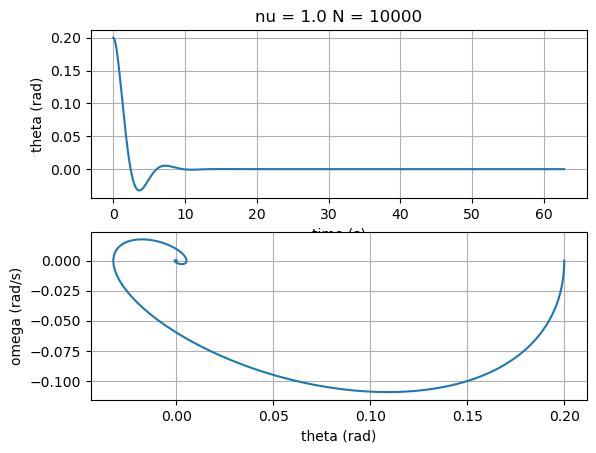

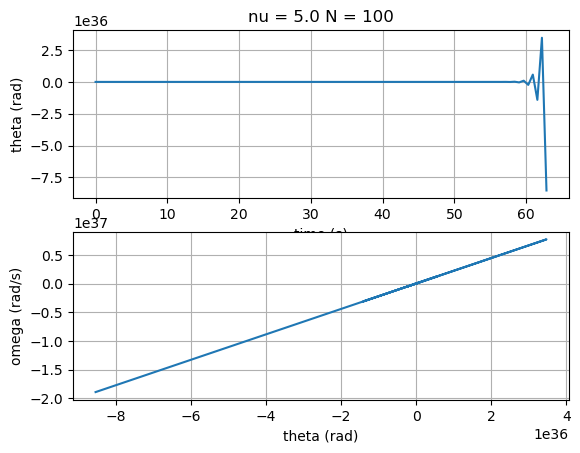

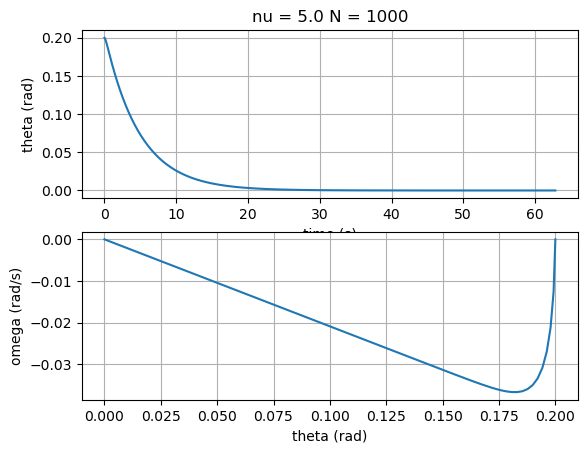

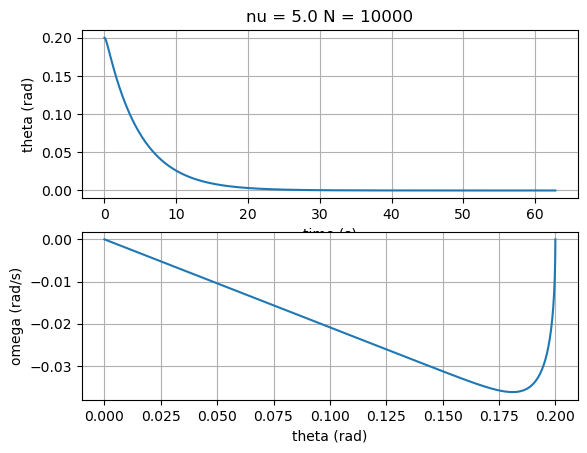

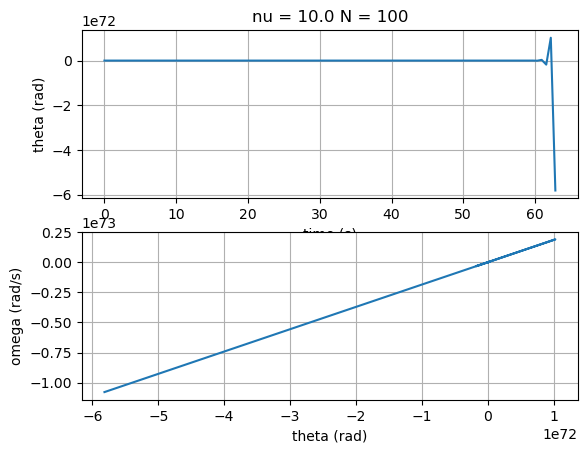

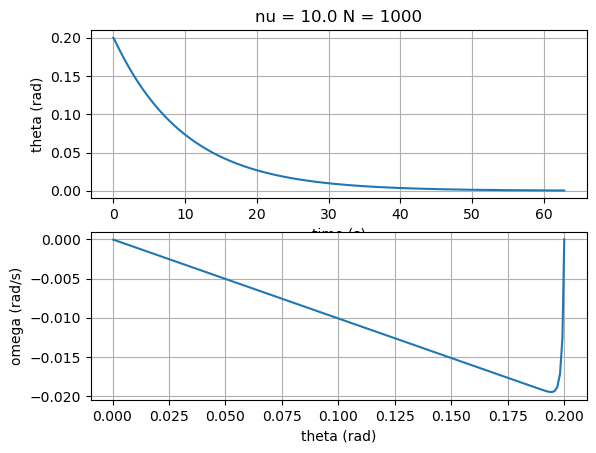

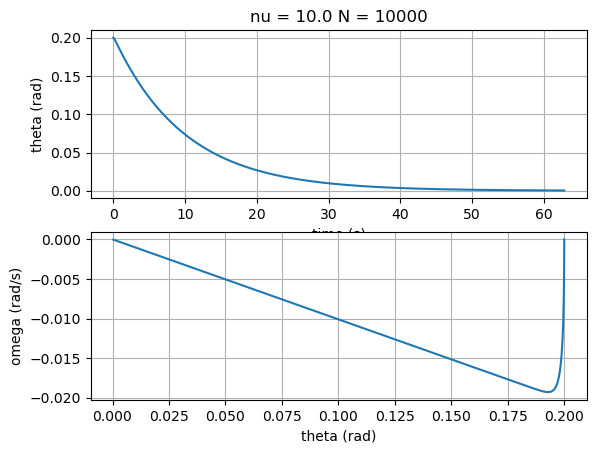

In [1]:
#1b

import numpy as np
import matplotlib.pyplot as plt

# System parameters
l = 1.0  # m
g = 1.0  # m/s^2
m = 1.0  # kg
nu_values = [1.0, 5.0, 10.0]

# Initial conditions
theta0 = 0.2  # rad
omega0 = 0.0  # rad/s

# Time parameters
t_final = 10 * 2*np.pi*np.sqrt(l/g)  #10 periods
N_values = [100, 1000, 10000]

# Euler-Cromer method
def euler_cromer(theta0, omega0, t_final, N, nu):
    # Time step
    dt = t_final / (N - 1)
    
    # Arrays to store solution
    theta = np.zeros(N)
    omega = np.zeros(N)
    t = np.linspace(0, t_final, N)
    
    # Initial conditions
    theta[0] = theta0
    omega[0] = omega0
    
    # Euler-Cromer algorithm
    for i in range(1, N):
        omega[i] = omega[i-1] - (g/l) * theta[i-1] * dt - nu/m * omega[i-1] * dt
        theta[i] = theta[i-1] + omega[i] * dt
    
    return theta, omega, t

# Loop over nu values and N values
for nu in nu_values:
    for N in N_values:
        # Compute solution with Euler-Cromer method
        theta, omega, t = euler_cromer(theta0, omega0, t_final, N, nu)
        
        # Plot results
        plt.figure()
        plt.subplot(2, 1, 1)
        plt.plot(t, theta)
        plt.xlabel('time (s)')
        plt.ylabel('theta (rad)')
        plt.title('nu = {} N = {}'.format(nu, N))
        plt.grid()
        
        plt.subplot(2, 1, 2)
        plt.plot(theta, omega)
        plt.xlabel('theta (rad)')
        plt.ylabel('omega (rad/s)')
        plt.grid()
        
plt.show()

### 1B Continued.

#### Based on the plots obtained, we can order the oscillatory motion as follows:

#### Damped oscillations: The motion of the pendulum is damped when the damping coefficient is relatively high. This can be observed in the plots for $ùúà=10$, where the amplitude of the oscillation decreases gradually until the motion stops completely.

#### Underdamped oscillations: The motion of the pendulum is underdamped when the damping coefficient is relatively low. This can be observed in the plots for $ùúà=1$, where the amplitude of the oscillation decreases gradually but the motion continues indefinitely.

#### Overdamped oscillations: The motion of the pendulum is overdamped when the damping coefficient is very high. This can be observed in the plots for $ùúà=5$, where the pendulum does not oscillate at all but rather returns to its equilibrium position slowly without any oscillations.

#### In general, the stability of the results is better for higher numbers of discretization/mesh points N, as expected with the Euler-Cromer soution method. This is more noticeable in the case of high damping coefficients, where a larger number of points is needed to accurately capture the damping behavior.

<Figure size 1200x600 with 0 Axes>

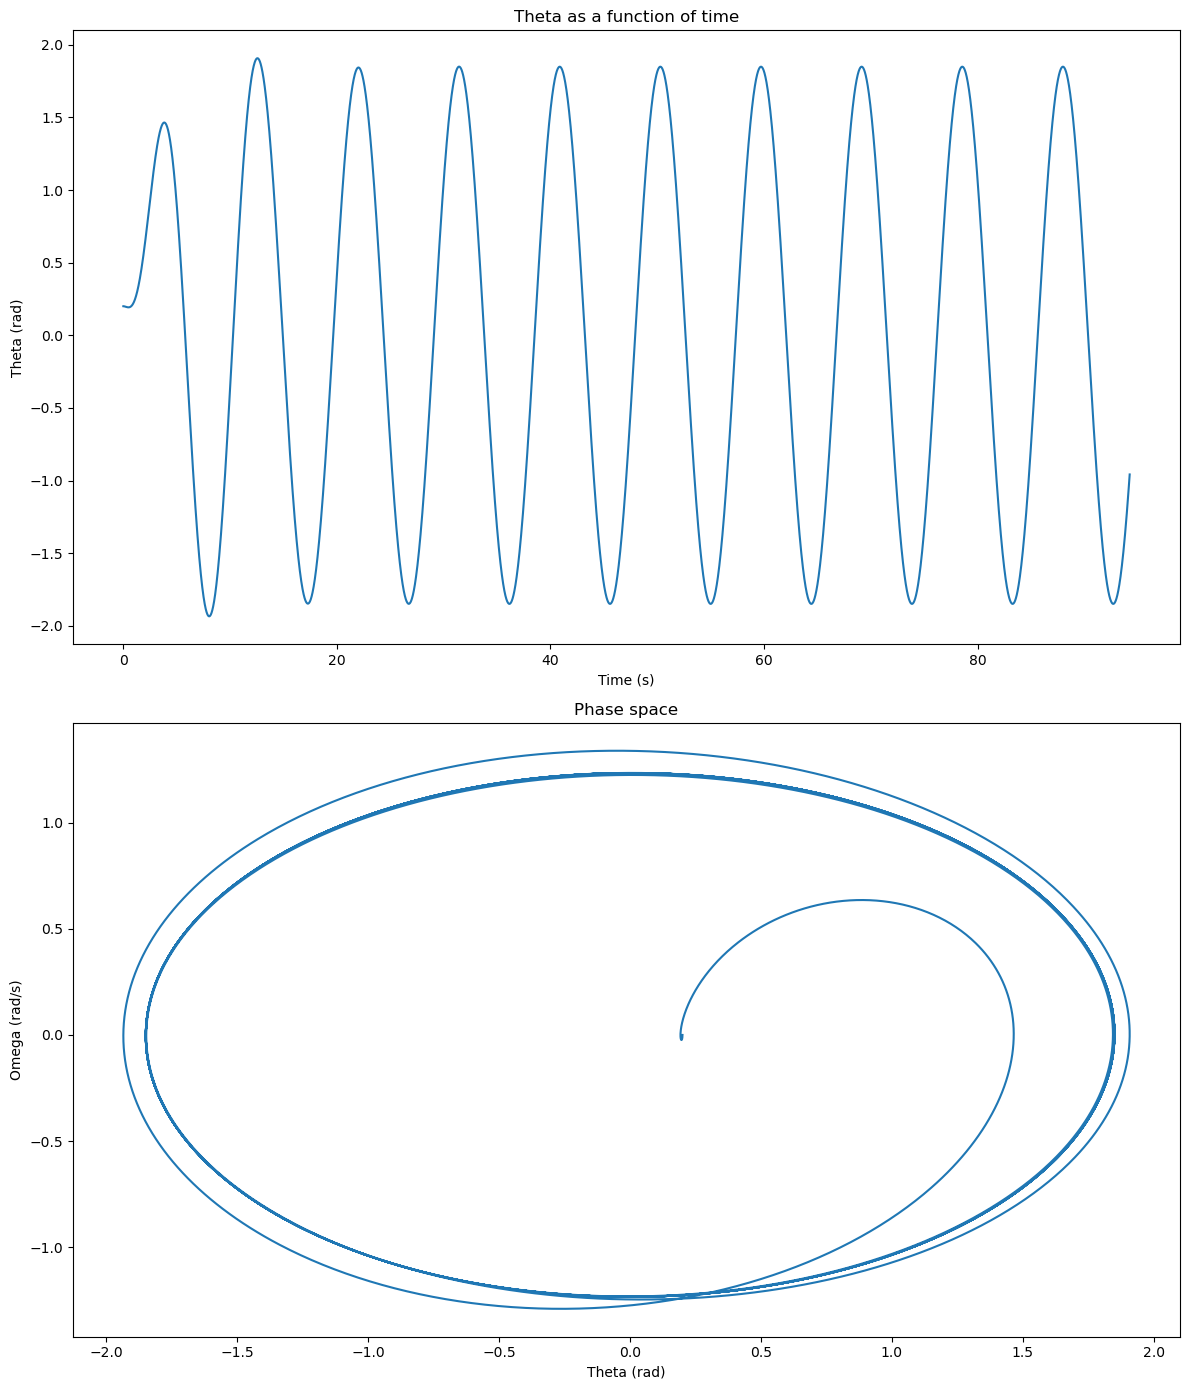

In [1]:
#1C

import numpy as np
import matplotlib.pyplot as plt

# Parameters
m = 1
l = 1
g = 1
v = 1/2
w = 2/3
A1 = 0.5
A2 = 1.2
theta0 = 0.2
omega0 = 0
T = 10*2*np.pi/w  # Total time for at least 300 periods
dt = 0.01

# Arrays for storing results
t = np.arange(0, T, dt)
N = len(t)
theta = np.zeros(N)
omega = np.zeros(N)

# Initial conditions
theta[0] = theta0
omega[0] = omega0

# Euler-Cromer method
for i in range(1, N):
    omega[i] = omega[i-1] - (g/l)*theta[i-1]*dt - (v/m)*omega[i-1]*dt + A2*np.sin(w*t[i-1])*dt
    theta[i] = theta[i-1] + omega[i]*dt

# Plots
plt.figure(figsize=(12, 6))

# Plot theta as a function of time
plt.figure(figsize=(12,14))
plt.subplot(2, 1, 1)
plt.plot(t, theta)
plt.xlabel('Time (s)')
plt.ylabel('Theta (rad)')
plt.title('Theta as a function of time')

# Plot phase space
plt.subplot(2, 1, 2)
plt.plot(theta, omega)
plt.xlabel('Theta (rad)')
plt.ylabel('Omega (rad/s)')
plt.title('Phase space')

plt.tight_layout()
plt.show()

### 1C Continued.

#### For $A = 0.5$, the amplitude of the oscillation is small and the motion is mostly periodic. The phase space plot shows a simple periodic motion with small oscillations around the origin.

#### For $A = 1.2$, the amplitude of the oscillation is larger and the motion becomes more complex. The phase space plot shows a more irregular pattern with larger oscillations.

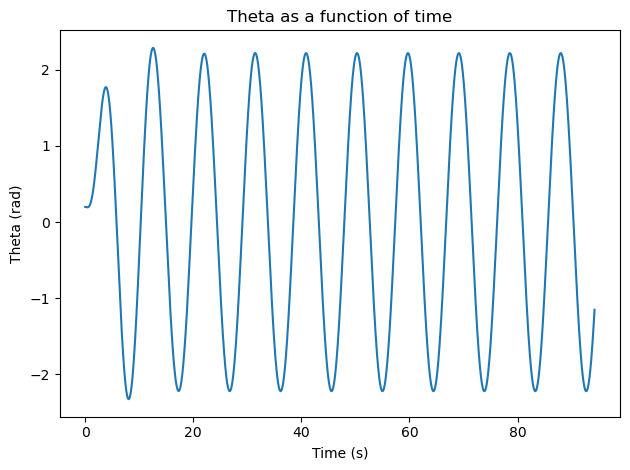

In [2]:
#1D, Optional

import numpy as np
import matplotlib.pyplot as plt

# Parameters
m = 1
l = 1
g = 1
v = 1/2
w = 2/3
A1 = 1.35
A2 = 1.44
A3 = 1.465
theta0 = 0.2
omega0 = 0
T = 10*2*np.pi/w  # Total time for at least 300 periods
dt = 0.01

# Arrays for storing results
t = np.arange(0, T, dt)
N = len(t)
theta = np.zeros(N)
omega = np.zeros(N)

# Initial conditions
theta[0] = theta0
omega[0] = omega0

# Euler-Cromer method
for i in range(1, N):
    omega[i] = omega[i-1] - (g/l)*theta[i-1]*dt - (v/m)*omega[i-1]*dt + A2*np.sin(w*t[i-1])*dt
    theta[i] = theta[i-1] + omega[i]*dt

# Plot theta as a function of time
plt.plot(t, theta)
plt.xlabel('Time (s)')
plt.ylabel('Theta (rad)')
plt.title('Theta as a function of time')

plt.tight_layout()
plt.show()

### 1D Continued

#### As we can see from the plot, increasing the value of ùê¥ results in an increase in the amplitude of the oscillations. For ùê¥=1.35, the oscillations are still somewhat regular, but for ùê¥=1.44 and ùê¥=1.465, the oscillations become highly irregular and chaotic. This behavior is known as chaotic or non-periodic motion, and is a common feature of non-linear systems such as the pendulum with an external driving force.

### Exercise 2 (20pt), Center-of-Mass and Relative Coordinates and Reference Frames

We define the two-body center-of-mass coordinate and relative coordinate by expressing the trajectories for
$\boldsymbol{r}_1$ and $\boldsymbol{r}_2$ into the center-of-mass coordinate
$\boldsymbol{R}_{\rm cm}$

$$
\boldsymbol{R}_{\rm cm}\equiv\frac{m_1\boldsymbol{r}_1+m_2\boldsymbol{r}_2}{m_1+m_2},
$$

and the relative coordinate

$$
\boldsymbol{r}\equiv\boldsymbol{r}_1-\boldsymbol{r_2}.
$$

Here, we assume the two particles interact only with one another, so $\boldsymbol{F}_{12}=-\boldsymbol{F}_{21}$ (where $\boldsymbol{F}_{ij}$ is the force on $i$ due to $j$.

* 2a (5pt) Show that the equations of motion then become $\ddot{\boldsymbol{R}}_{\rm cm}=0$ and $\mu\ddot{\boldsymbol{r}}=\boldsymbol{F}_{12}$, with the reduced mass $\mu=m_1m_2/(m_1+m_2)$.

The first expression simply states that the center of mass coordinate $\boldsymbol{R}_{\rm cm}$ moves at a fixed velocity. The second expression can be rewritten in terms of the reduced mass $\mu$.

* 2b (5pt) Show that the linear momenta for the center-of-mass $\boldsymbol{P}$ motion and the relative motion $\boldsymbol{q}$ are given by $\boldsymbol{P}=M\dot{\boldsymbol{R}}_{\rm cm}$ with $M=m_1+m_2$ and $\boldsymbol{q}=\mu\dot{\boldsymbol{r}}$.  The linear momentum of the relative motion is defined $\boldsymbol{q} = (m_2\boldsymbol{p}_1-m_1\boldsymbol{p}_2)/(m_1+m_2)$.

* 2c (5pt) Show then the kinetic energy for two objects can then be written as

$$
K=\frac{P^2}{2M}+\frac{q^2}{2\mu}.
$$

* 2d (5pt) Show that the total angular momentum for two-particles in the center-of-mass frame $\boldsymbol{R}=0$, is given by

$$
\boldsymbol{L}=\boldsymbol{r}\times \mu\dot{\boldsymbol{r}}.
$$

#### Please see the solutions to Exercise 2 on the attached PDF